# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

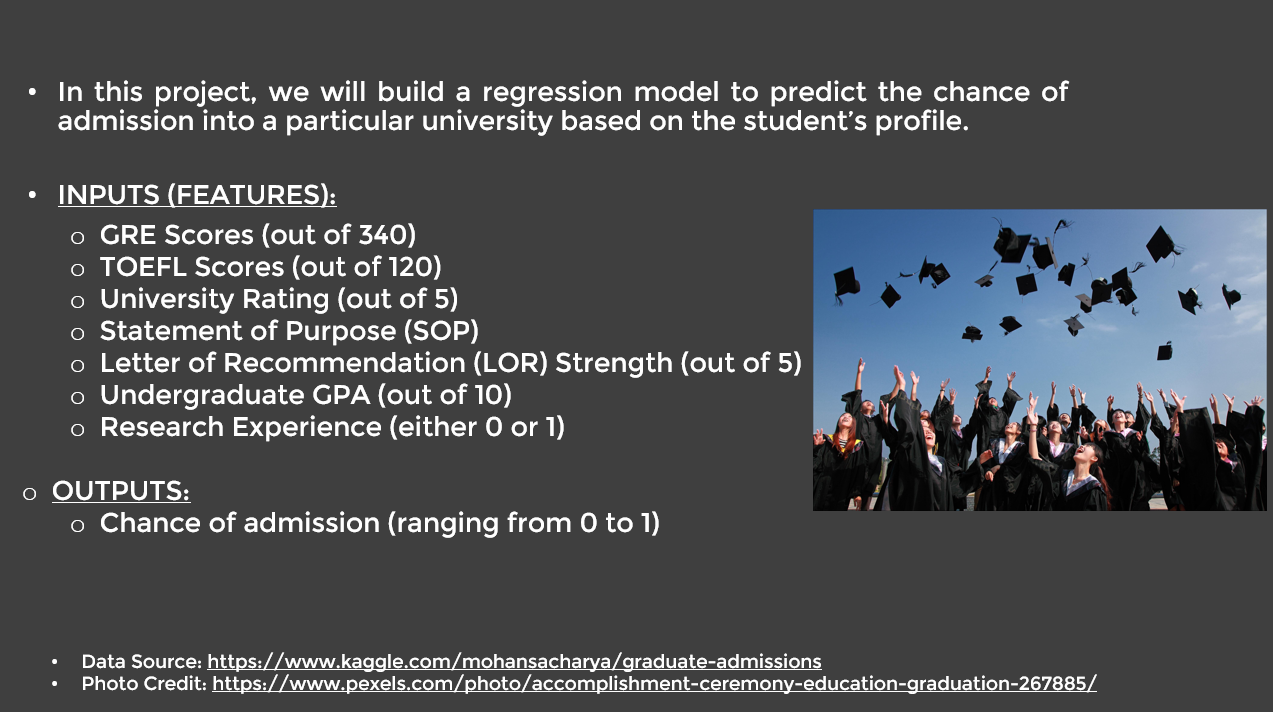

# TASK #2: IMPORT LIBRARIES AND DATASET

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [52]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [53]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
# Let's drop the serial no.
admission_df.drop("Serial No.", axis=1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [55]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [56]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [57]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [58]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd365e1b990>,
      dtype=object)

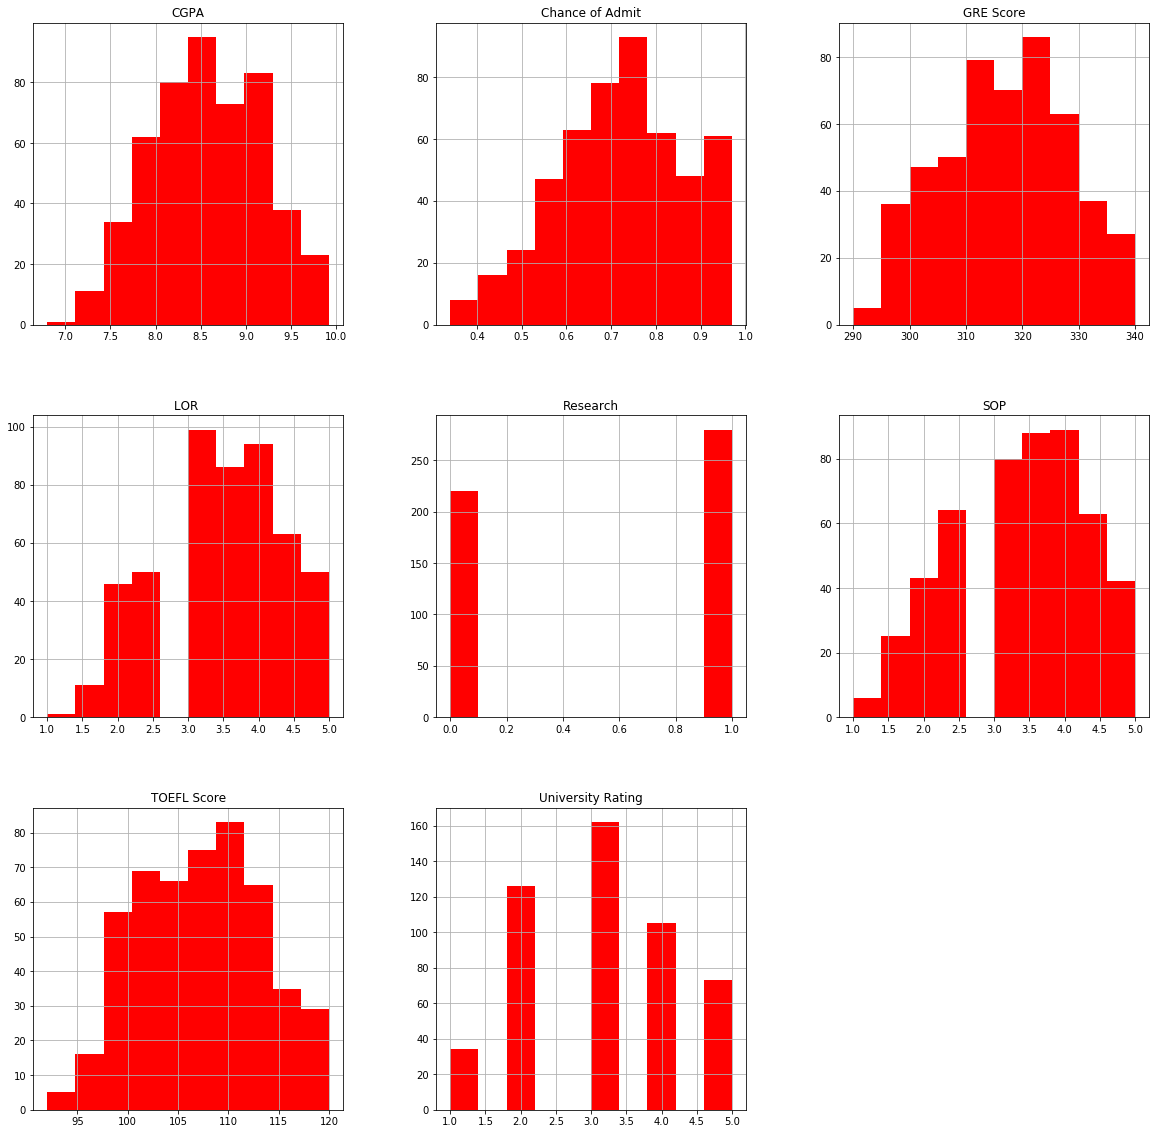

In [59]:
admission_df.hist(bins = 10, figsize = (20, 20), color = 'r')

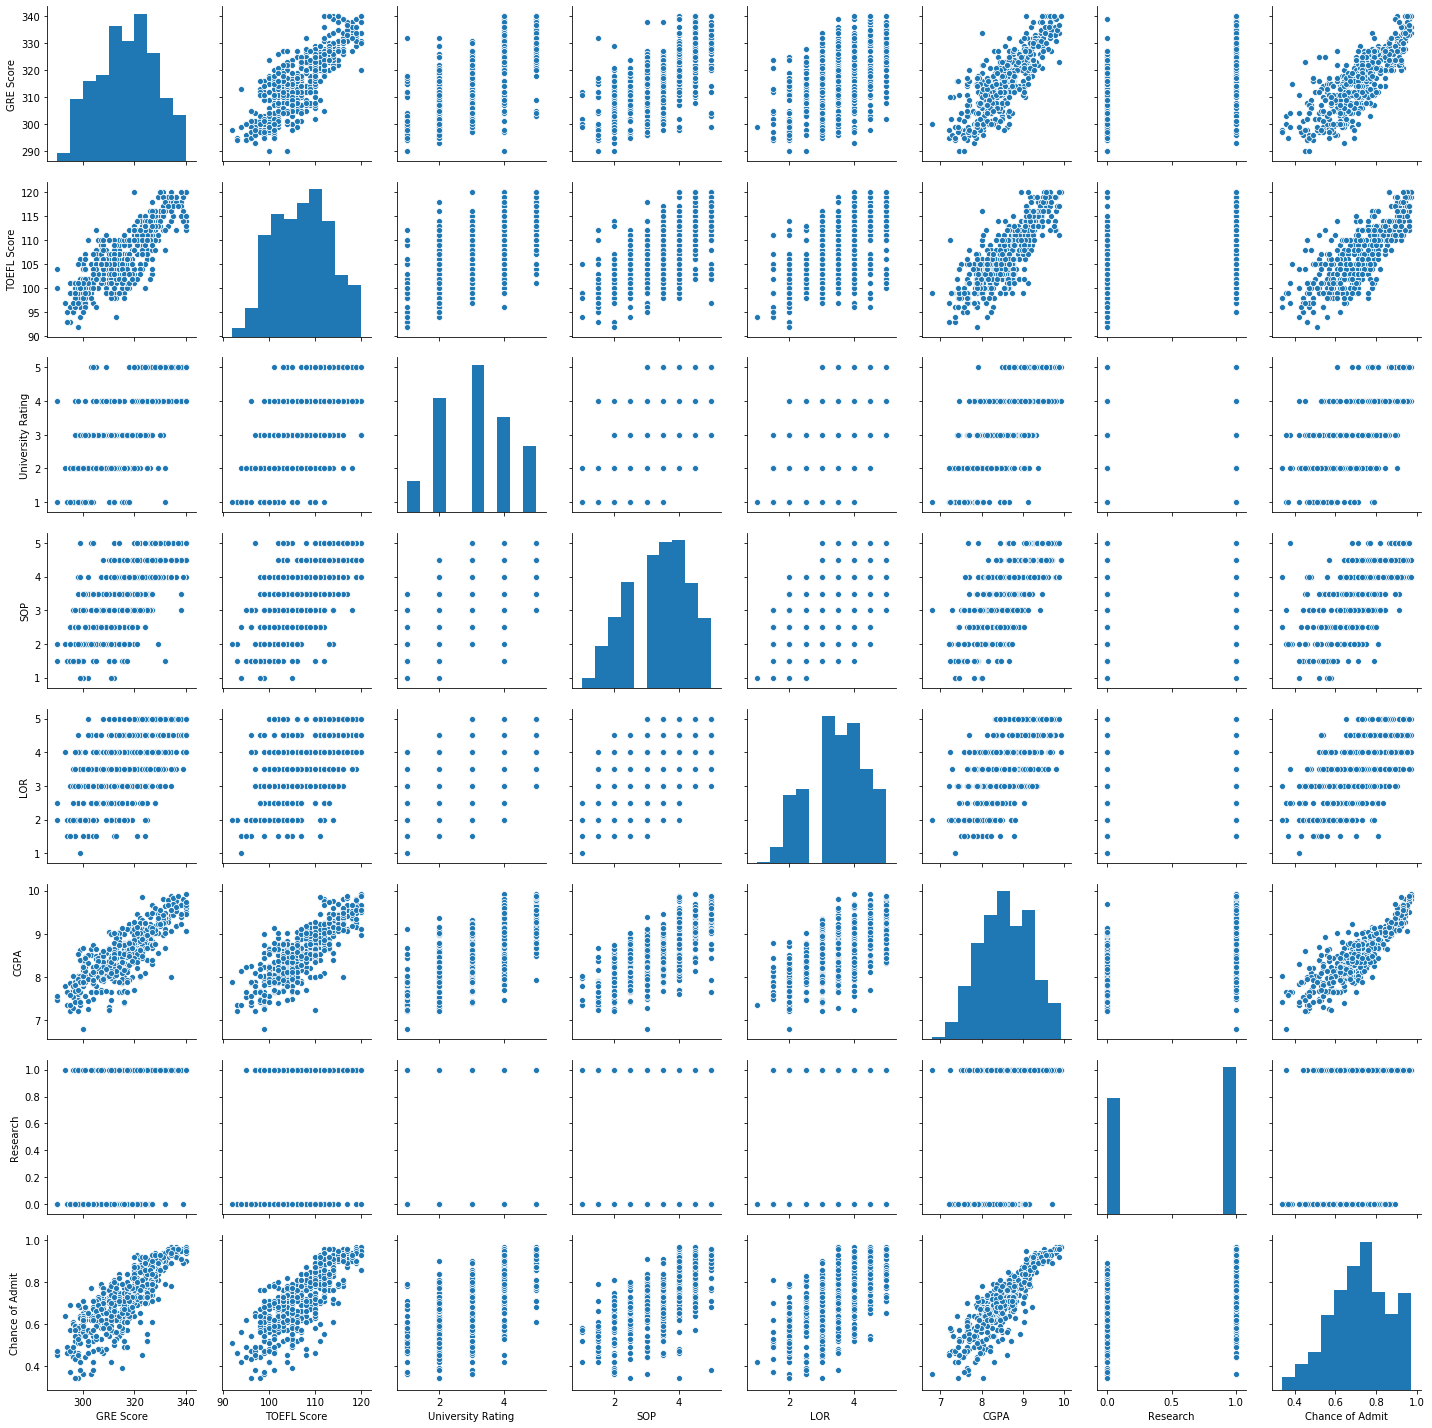

In [60]:
sns.pairplot(admission_df)

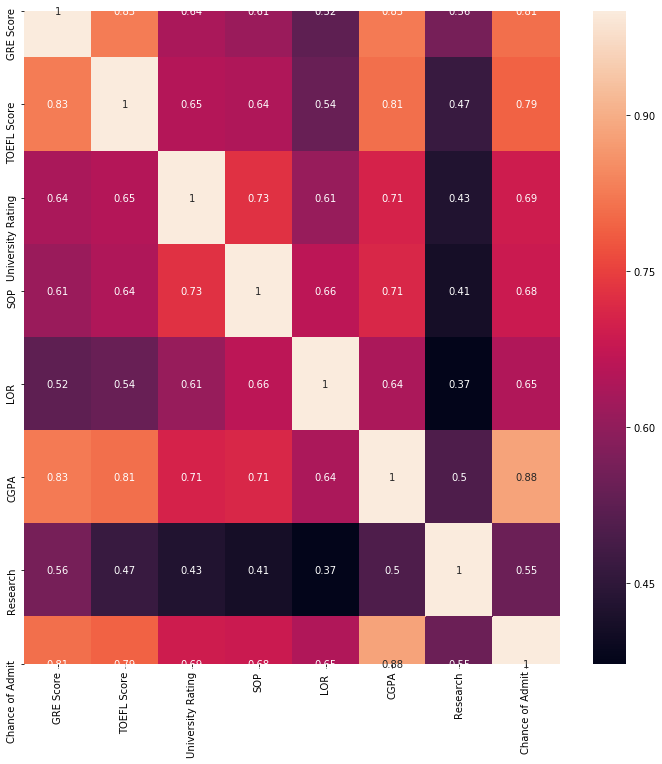

In [61]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [62]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [63]:
predictors = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research',]
X = admission_df [predictors]

In [64]:
y = admission_df[['Chance of Admit']]

In [65]:
X.shape

(500, 7)

In [66]:
y.shape

(500, 1)

In [67]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [68]:
X = np.array(X)
y = np.array(y)

In [69]:
y.shape

(500, 1)

In [70]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [71]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

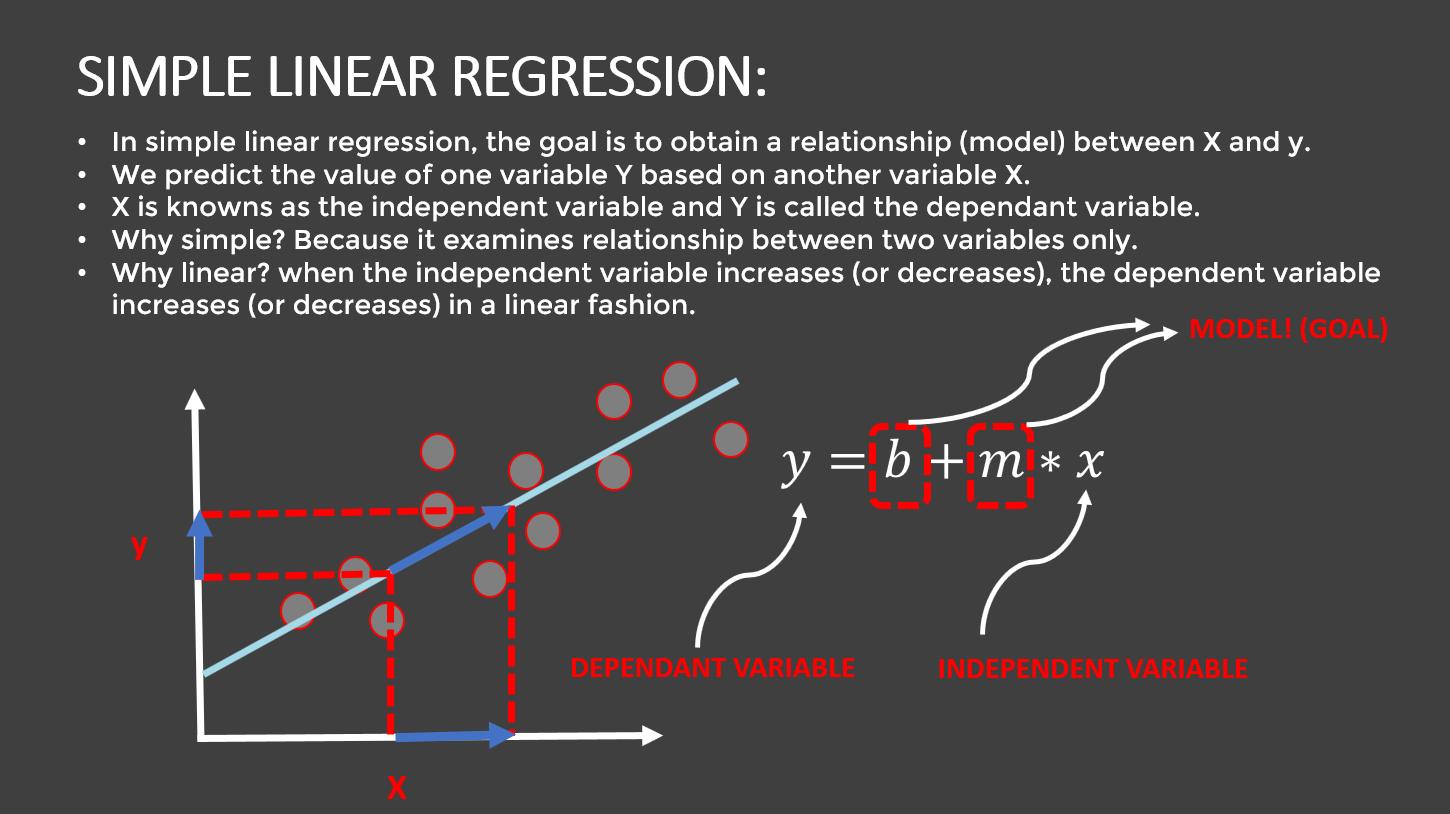

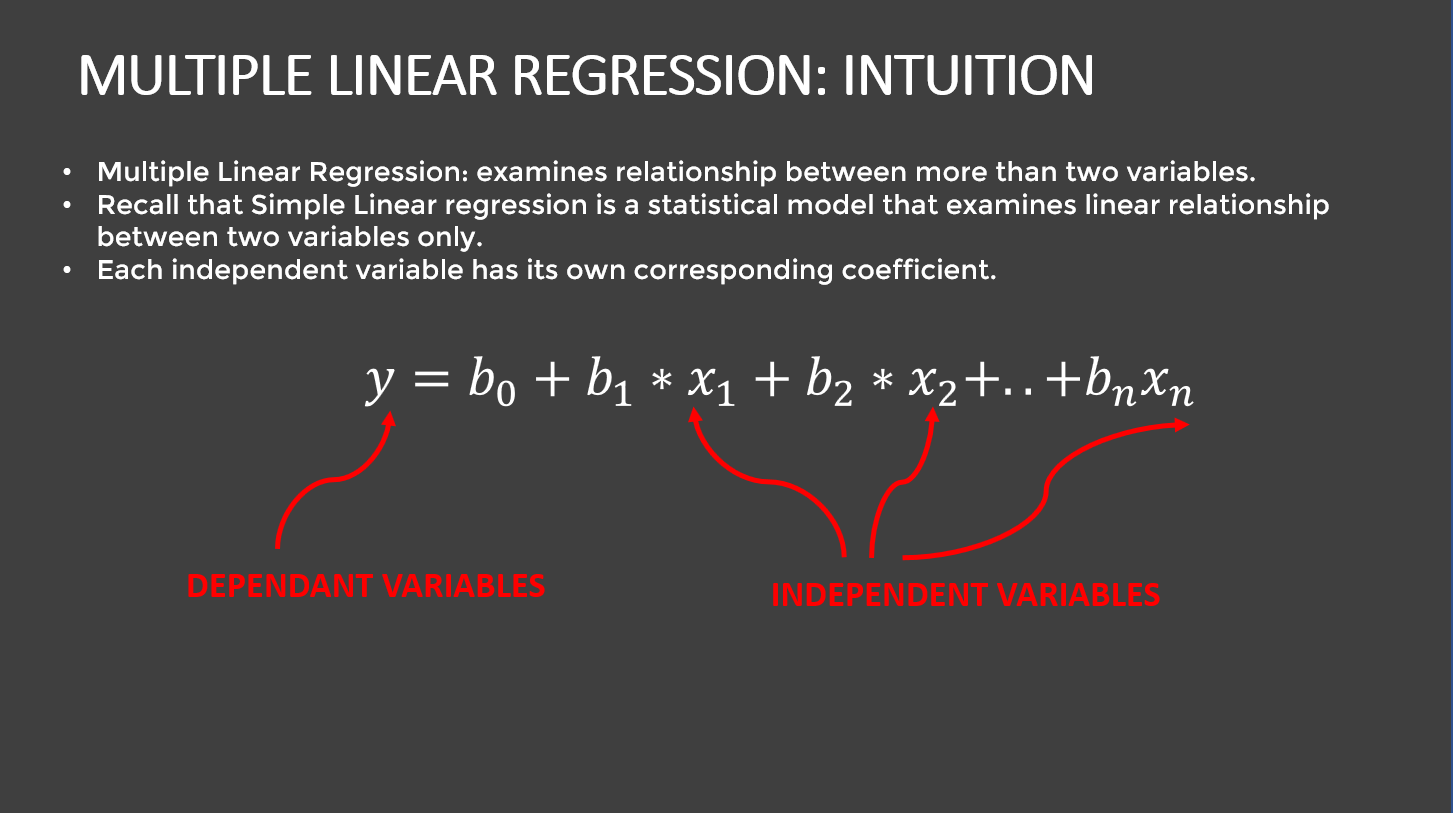

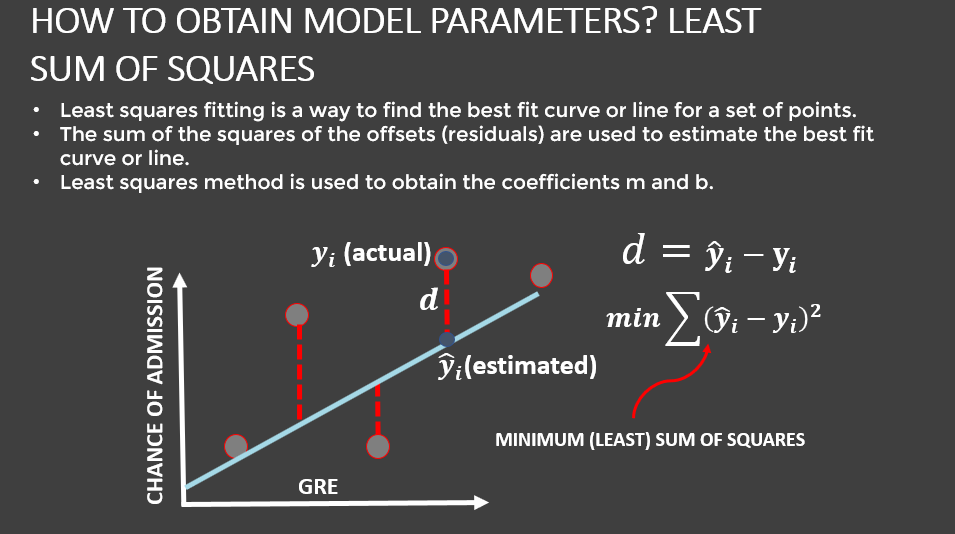

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [73]:
rge = LinearRegression()
rge.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
rge_score = rge.score(x_test, y_test)
rge_score

0.7898027929730181

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

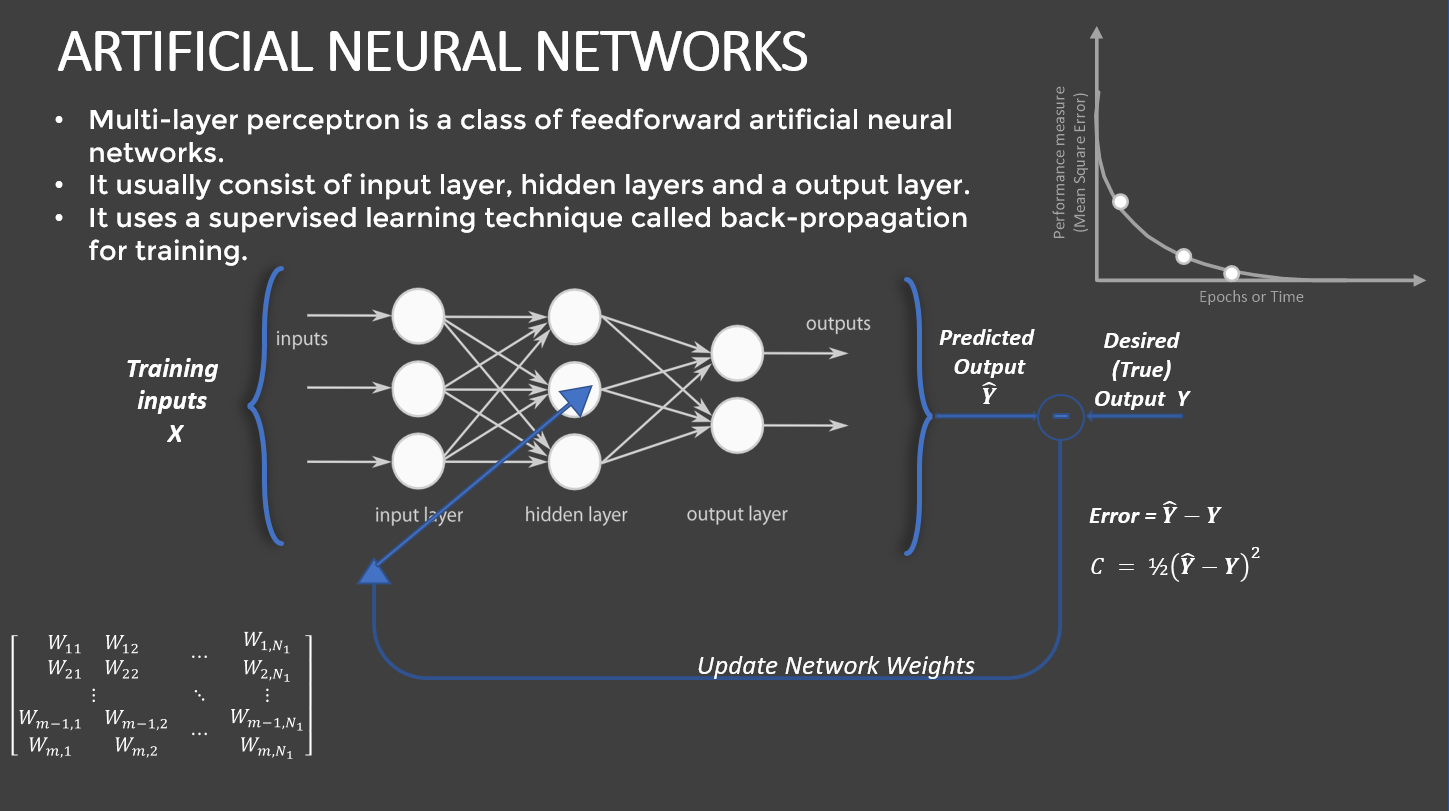

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
ANN_model = keras.Sequential()

ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))

ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [37]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [39]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5530 - val_loss: 0.2151
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3458 - val_loss: 0.2307
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3263 - val_loss: 0.2290
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2864 - val_loss: 0.2140
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2635 - val_loss: 0.2151
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2259 - val_loss: 0.2043
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2283 - val_loss: 0.2383
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2153 - val_loss: 0.2224
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2360 - val_loss: 0.2877
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2128 - val_loss: 0.2075
Epoch 11/

17/17 [==============================] - 0s 3ms/step - loss: 0.1010 - val_loss: 0.3043
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1128 - val_loss: 0.3000
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1340 - val_loss: 0.3145
Epoch 86/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - val_loss: 0.3354
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - val_loss: 0.2732
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - val_loss: 0.2828
Epoch 89/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - val_loss: 0.3218
Epoch 90/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1089 - val_loss: 0.2981
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.1033 - val_loss: 0.2952
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0969 - val_loss: 0.2875
Epoch 93/100


In [41]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 912us/step - loss: 0.3915
Accuracy : 0.6085056662559509


In [42]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

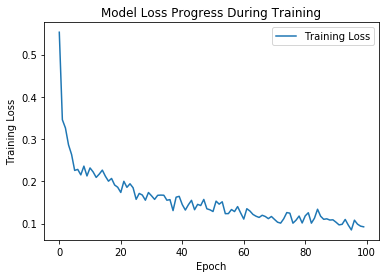

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [44]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor()
DTmodel.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
DTmodel_score = DTmodel.score(x_test, y_test)
DTmodel_score

0.801027900146843

In [ ]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [47]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(n_estimators = 100, max_depth=10)
RFreg.fit(x_train, y_train)

/Users/teetom/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
RFreg_score = RFreg.score(x_test, y_test)
RFreg_score

0.7975382406768903

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

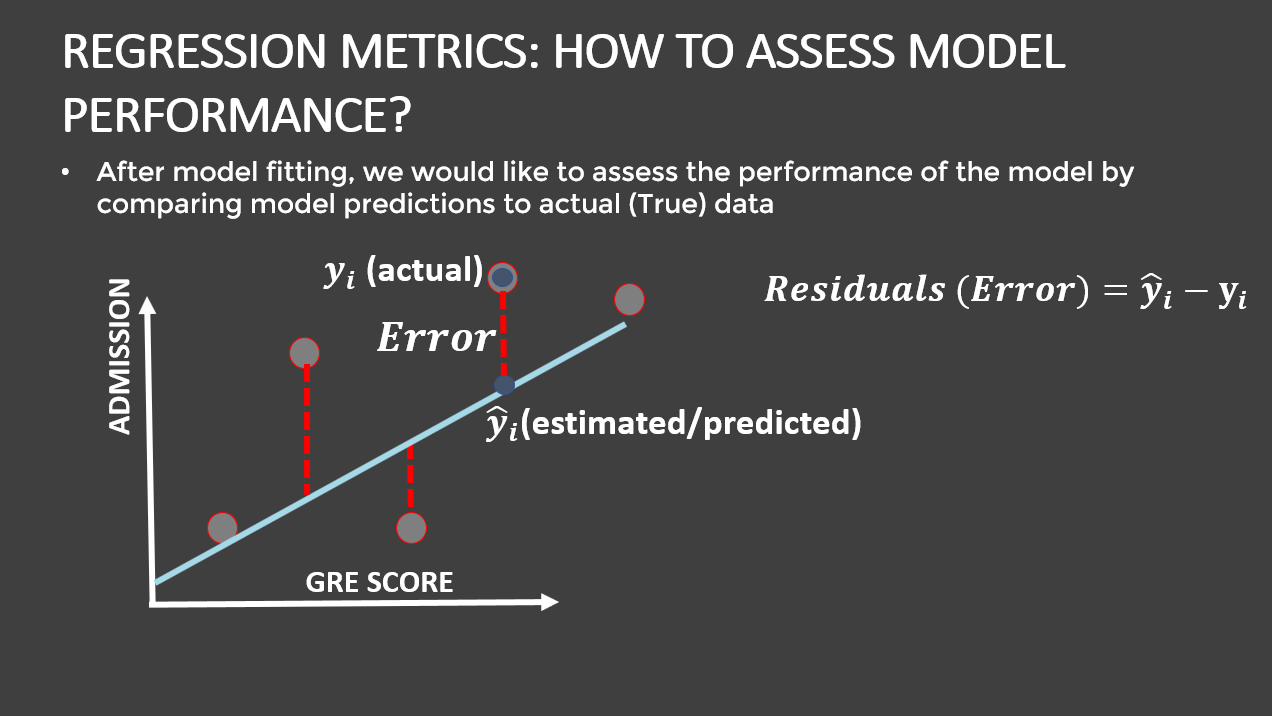

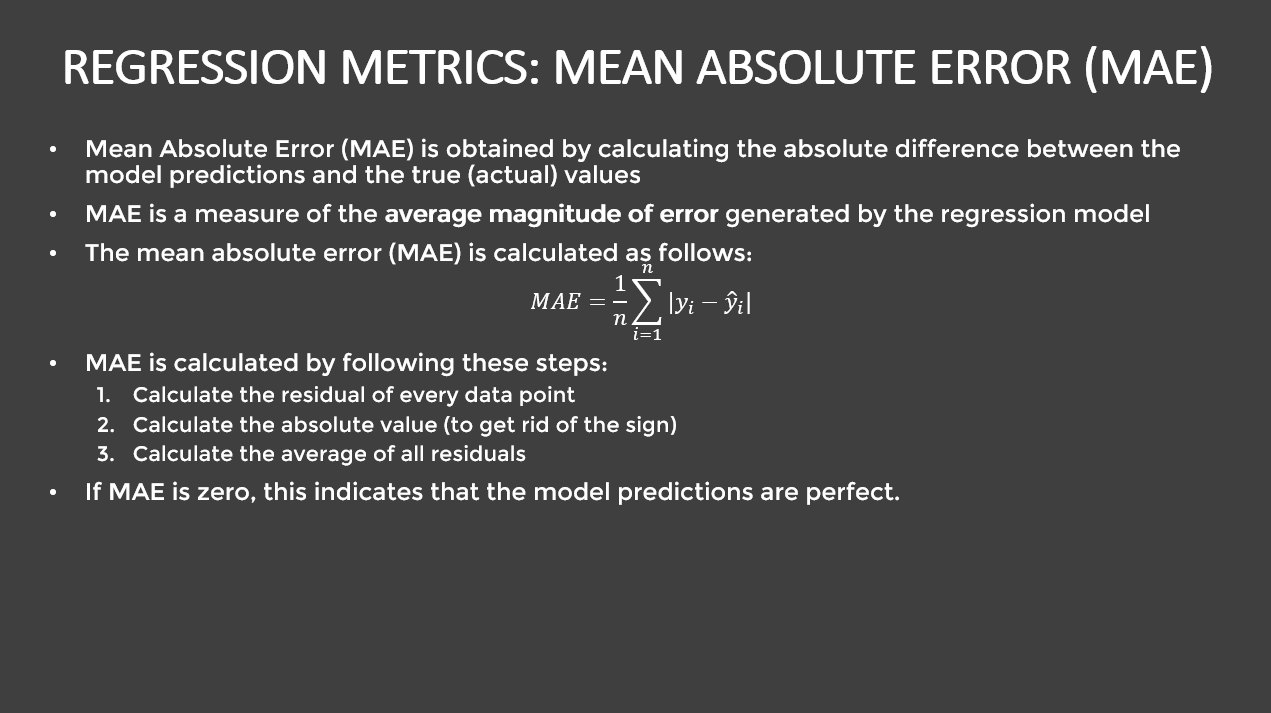

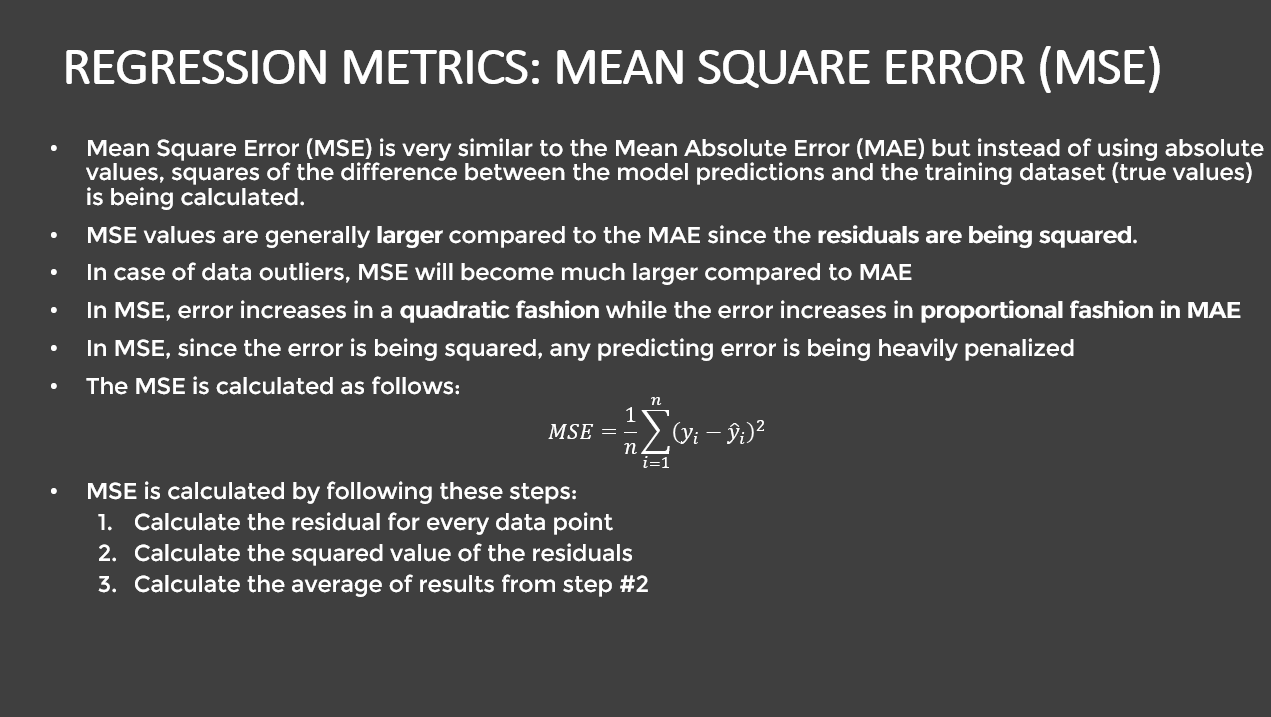

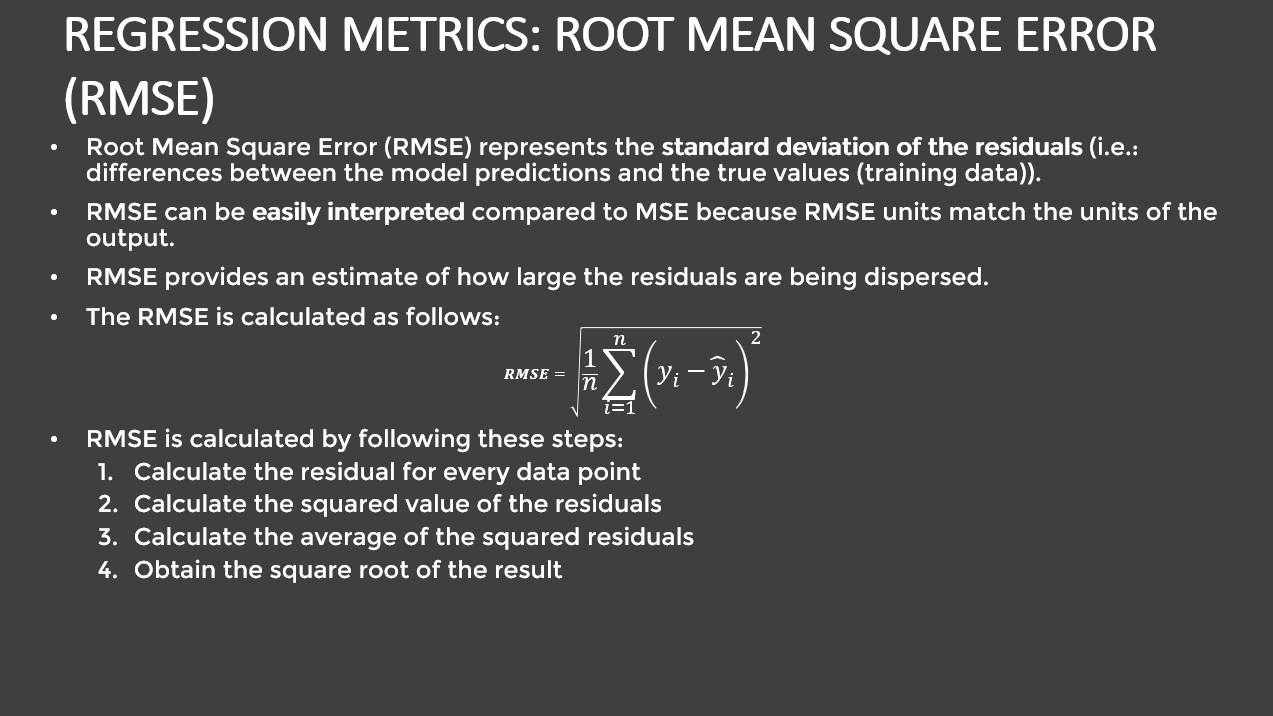

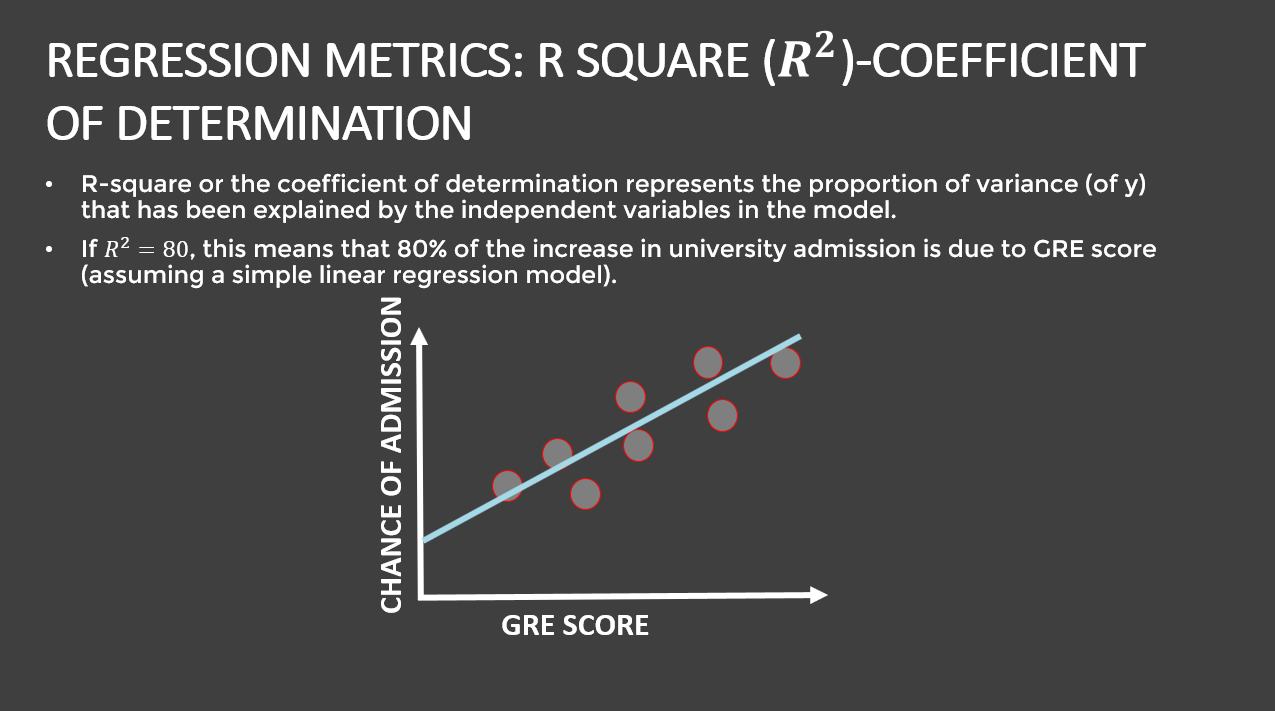

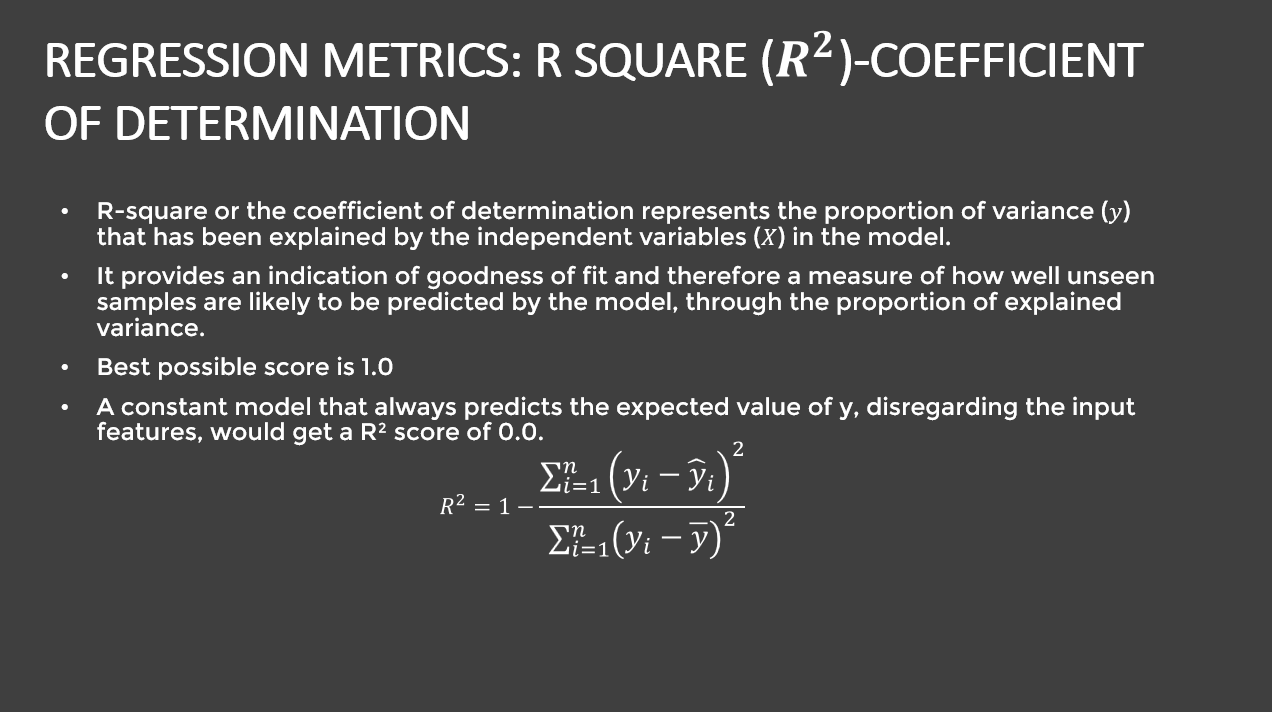

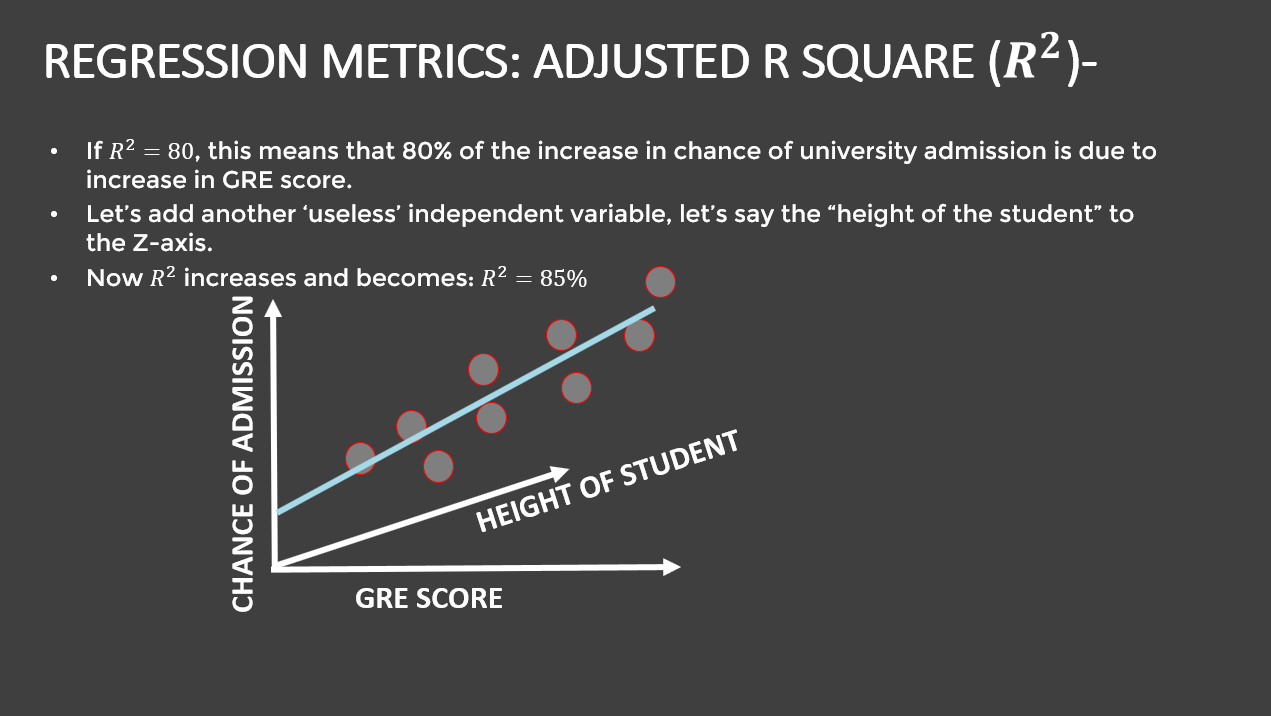

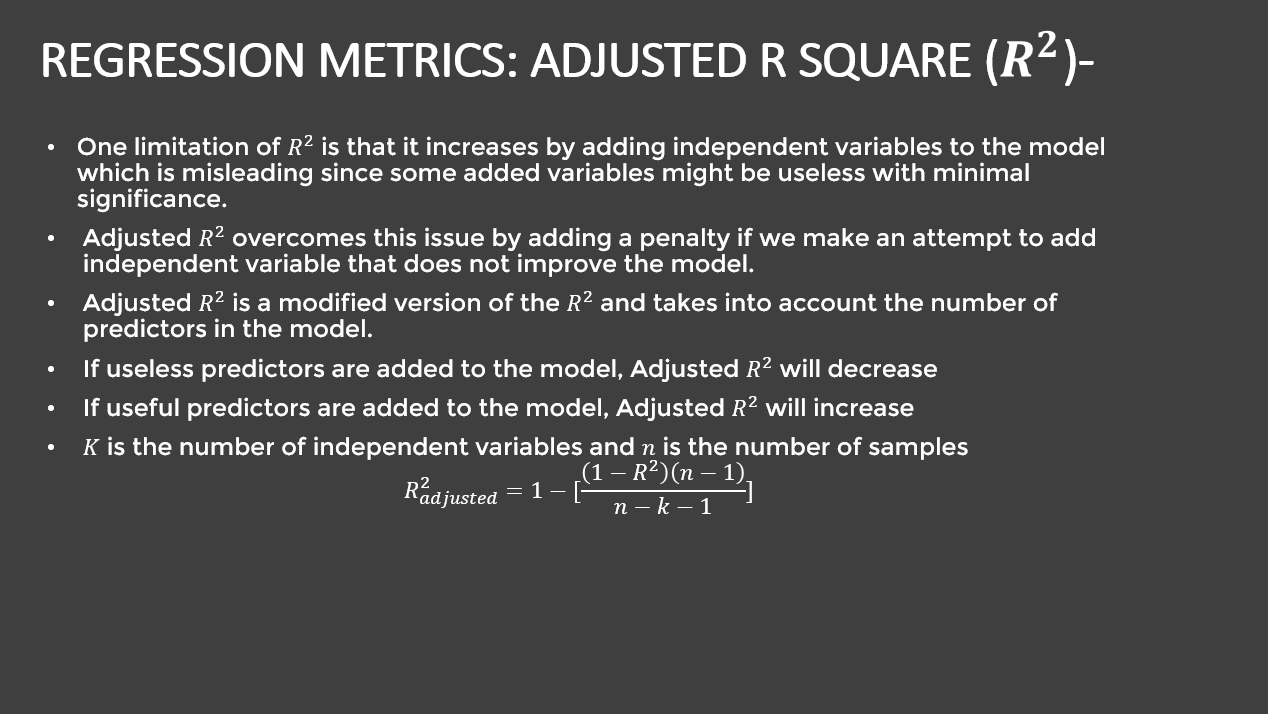

# TASK #10: CALCULATE REGRESSION MODEL KPIs

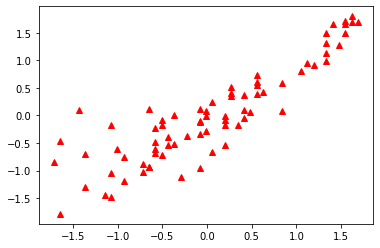

In [75]:
y_hat = rge.predict(x_test)
plt.plot(y_test, y_hat, '^', color = 'r')
plt.show()

In [76]:
y_hat_original = scaler_y.inverse_transform(y_hat)
y_test_original = scaler_y.inverse_transform(y_test)

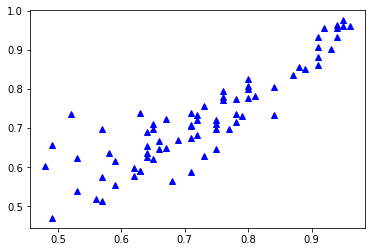

In [77]:
plt.plot(y_test_original, y_hat_original, '^', color = 'b')

In [80]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_hat_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_hat_original)
MAE = mean_absolute_error(y_test_original, y_hat_original)
r2 = r2_score(y_test_original, y_hat_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.058 
MSE = 0.0034210538995548385 
MAE = 0.04220325721298163 
R2 = 0.7898027929730183 
Adjusted R2 = 0.7678418907463187


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS